### 2022年度計算機演習A・B

# 第9回レポート課題の解説

### 演習1

次の関数のグラフを描画してください。

$$
y=\sin x^3 \cos x+1, \quad 1\leq x\leq 2
$$

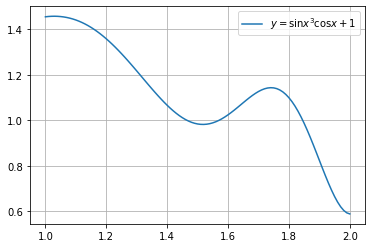

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1,2,101)  #1から2まで101個の数からなる1次元配列xを作成
y = np.sin(x**3)*np.cos(x)+1  #xの各要素に対応する関数値を一括計算して1次元配列yを作成

plt.plot(x,y,"-",label="$y=\sin x^3\cos x+1$")
plt.grid()
plt.legend()
plt.show()

### 演習2

次の行列 $A$ とベクトル $b$ に対して、方程式 $Ax=b$ の解 $x$ を求めてください。

$$
A=
\begin{pmatrix}
2 & 1 & 0\\
1 & 2 & 1\\
0 & 1 & 2
\end{pmatrix}
,\quad b=
\begin{pmatrix}
1\\
2\\
3
\end{pmatrix}
$$

In [2]:
import numpy as np

A = np.array([[2,1,0],[1,2,1],[0,1,2]])
b = np.array([[1],[2],[3]])

print(np.linalg.inv(A)@b)  #「np.linalg.inv(A)」はAの逆行列、行列としての積は「*」ではなく「@」

[[5.0000000e-01]
 [4.4408921e-16]
 [1.5000000e+00]]


この答えは何かおかしいと思うかもしれませんが、間違いではありません。`ae-b`と`ae+b`の形の表示は**指数表記**と呼ばれるもので、それぞれ $a\times 10^{-b}$、$a\times 10^{b}$ と同じ意味です。

NumPyの多次元配列を表示する際には、デフォルトで絶対値の非常に小さな要素が含まれている、または絶対値が最大の要素と最小の要素の比が一定の値を超える場合に、自動的に全ての要素が指数表記になります。

理論的な答えが $x=(0.5,0,1.5)^T$ であるにも関わらず上記の答えになってしまうのは、コンピュータにおいて小数（浮動小数点数）の計算を有限桁数の2進数で行うために生じる誤差が根本的な原因です。

誤差の発生を抑えることは難しいですが、次のように表示の際に指数表記を使わない設定は可能です。

In [3]:
import numpy as np

A = np.array([[2,1,0],[1,2,1],[0,1,2]])
b = np.array([[1],[2],[3]])

np.set_printoptions(suppress=True)  #printの際の指数表記を禁止する
print(np.linalg.inv(A)@b)

[[0.5]
 [0. ]
 [1.5]]


この答えは理論的な答えと一致しているように見えますが、表示の上で適当な位で四捨五入されているだけであり、実際の値には誤差が含まれたままです。次のように表示の際の精度（小数点以下の桁数）を指定すれば、そのことが確認できます。

In [4]:
import numpy as np

A = np.array([[2,1,0],[1,2,1],[0,1,2]])
b = np.array([[1],[2],[3]])

np.set_printoptions(suppress=True,precision=20)  #printの際の指数表記を禁止し、さらに小数点以下の桁数を指定する
print(np.linalg.inv(A)@b)

[[0.4999999999999998    ]
 [0.00000000000000044409]
 [1.4999999999999998    ]]
